In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

C:\Users\Admin\AppData\Local\Temp\ipykernel_13072\770345019.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



(5 pts) Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-dataLinks to an external site.  or https://www.kaggle.com/datasets/imakash3011/customer-personality-analysisLinks to an external site. . How are you handling nulls? What process(es) are you using to encode and normalize the data?

(10 pts) Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

(7 pts) Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

(3 pts) Compare the results of 2 and 3. Which approach do you think is best? Why?


In [12]:
personality_df = pd.read_csv("marketing_campaign.csv")

personality_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
import random

def personality_df_nulls(DATAFRAME: pd.DataFrame) -> pd.DataFrame:

    """Specifically for the marketing_campaign.csv file to fill the nulls. Largely Naive approach to filling nulls"""
    
    DATAFRAME['Year_Birth'] = DATAFRAME['Year_Birth'].fillna(random.randint(1940,2000))
    DATAFRAME['Education'] = DATAFRAME['Education'].fillna('Graduate')
    DATAFRAME['Income'] = DATAFRAME['Income'].fillna(random.randint(30000,100000))
    DATAFRAME['Kidhome'] = DATAFRAME['Kidhome'].fillna(random.randint(0,1))
    DATAFRAME['Teenhome'] = DATAFRAME['Teenhome'].fillna(random.randint(0,1))
    DATAFRAME = DATAFRAME.drop('Dt_Customer',axis=1) # column didn't have consistant enough values to be of use
    DATAFRAME['Recency'] = DATAFRAME['Recency'].fillna(DATAFRAME['Recency'].dropna().mean())
    DATAFRAME['MntWines'] = DATAFRAME['MntWines'].fillna(DATAFRAME['MntWines'].dropna().median())
    DATAFRAME['MntFruits'] = DATAFRAME['MntFruits'].fillna(DATAFRAME['MntFruits'].dropna().median())
    DATAFRAME['MntMeatProducts'] = DATAFRAME['MntMeatProducts'].fillna(DATAFRAME['MntMeatProducts'].dropna().median())
    DATAFRAME['MntFishProducts'] = DATAFRAME['MntFishProducts'].fillna(DATAFRAME['MntFishProducts'].dropna().median())
    DATAFRAME['MntSweetProducts'] = DATAFRAME['MntSweetProducts'].fillna(DATAFRAME['MntSweetProducts'].dropna().median())
    DATAFRAME['MntGoldProds'] = DATAFRAME['MntGoldProds'].fillna(DATAFRAME['MntGoldProds'].dropna().median())
    DATAFRAME['NumDealsPurchases'] = DATAFRAME['NumDealsPurchases'].fillna(DATAFRAME['NumDealsPurchases'].dropna().median())
    DATAFRAME['NumWebPurchases'] = DATAFRAME['NumWebPurchases'].fillna(random.randint(0,14))
    DATAFRAME['NumCatalogPurchases'] = DATAFRAME['NumCatalogPurchases'].fillna(random.randint(0,11))
    DATAFRAME['NumStorePurchases'] = DATAFRAME['NumStorePurchases'].fillna(DATAFRAME['NumStorePurchases'].dropna().mean())
    DATAFRAME['NumWebVisitsMonth'] = DATAFRAME['NumWebVisitsMonth'].fillna(DATAFRAME['NumWebVisitsMonth'].dropna().median())
    DATAFRAME['AcceptedCmp3'] = DATAFRAME['AcceptedCmp3'].fillna(0)
    DATAFRAME['AcceptedCmp4'] = DATAFRAME['AcceptedCmp4'].fillna(0)
    DATAFRAME['AcceptedCmp5'] = DATAFRAME['AcceptedCmp5'].fillna(0)
    DATAFRAME['AcceptedCmp1'] = DATAFRAME['AcceptedCmp1'].fillna(0)
    DATAFRAME['AcceptedCmp2'] = DATAFRAME['AcceptedCmp2'].fillna(0)
    DATAFRAME['Complain'] = DATAFRAME['Complain'].fillna(0)
    DATAFRAME['Z_CostContact'] = DATAFRAME['Z_CostContact'].fillna(3)
    DATAFRAME['Z_Revenue'] = DATAFRAME['Z_Revenue'].fillna(11)
    DATAFRAME['Response'] = DATAFRAME['Response'].fillna(0)
    DATAFRAME = DATAFRAME.drop('ID',axis=1) # doesn't correlate with anything

    return(DATAFRAME)

personality_df_nulls(personality_df)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [17]:
def personality_df_categorical_conversion (DATAFRAME: pd.DataFrame) -> pd.DataFrame:
    """Converts the categorical values of the personality_df into numerical ones"""
    Education_ordinal_converter = lambda x: (0 if x == "Basic" else 
                                                (1 if x == "Graduation" else 
                                                    (2 if x == '2n Cycle' else   
                                                        (3 if x == "Master" else 
                                                            (4 if x == "PhD" else x)))))

    personality_df['Education'] = personality_df['Education'].apply(Education_ordinal_converter)

    Marital_Status_converter = lambda j: (0 if j == 'Married' else 
                                            (1 if j == 'Together' else 
                                                (2 if j == 'Single' else 
                                                    (3 if j == 'Divorced' else 
                                                        (4 if j == 'Widow' else 
                                                            (5 if j == 'Alone' else 
                                                                (6 if j == 'Absurd' else 
                                                                    (7 if j == 'YOLO' else j))))))))

    personality_df['Marital_Status'] = personality_df['Marital_Status'].apply(Marital_Status_converter)

personality_df_categorical_conversion(personality_df)


# k-means

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

'Done'

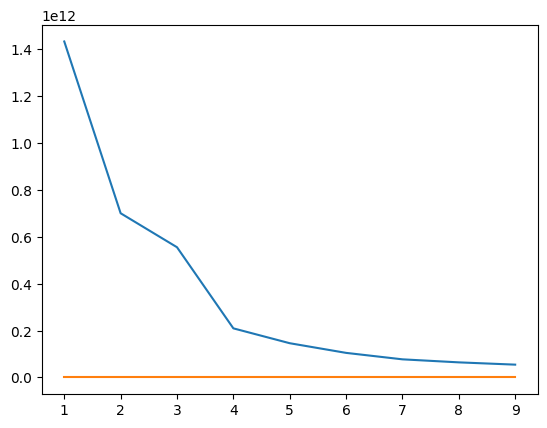

In [21]:
def k_means_n_finder(DATAFRAME: pd.DataFrame,PREDICTION_COLUMN) -> str:
    """This finds the optimal number of clusters"""
    x = DATAFRAME.drop(PREDICTION_COLUMN,axis=1)
    y = DATAFRAME[PREDICTION_COLUMN]

    inertias = []
    distortions = []

    for k in range(1,10):
        model = KMeans(n_clusters=k).fit(x)

        distance = cdist(x, model.cluster_centers_,
                                    'euclidean')
        distortion = sum(np.min(distance,axis =1))/x.shape[0]
        distortions.append(distortion)


        inertia = model.inertia_
        inertias.append(inertia)

    plt.plot(range(1,10),inertias)
    plt.plot(range(1,10),distortions)

    return("Done")

k_means_n_finder(personality_df,'Response')

Using the elbow method we find that 3 clusters is the best (distortion also agrees on that)

As for what data should be used, and what data isn't useful. The dates might have had correlation to something if they were put into groups, but using this method, that wouldn't be worth it. Also, ID numbers didn't correlate with response.

Otherwise, You would need some buissness logic to narrow down the clusters further (unless I am just not thinking hard enough)

In [ ]:
# dendro code here

I emailed, Everytime I try and run the hierarchical sorting method my kernal crashes. Do not know why, But I have been unable to fix it

Moving on,

Since I cannot compare the results directly I will just compare the methods themselves.

A denrogram is a very good visualizer for showing why you chose the groups you did, useful presentation to a lame audience. compared to k-means it is computationallly costly Which may be a hinderance for large datasets, though k-means does require that you chose a number of clusters beforehand, otherwise you need to run the ML more than once.